# Linear Regression

#### Predict car selling price with appropriate features

In [2]:
#importing necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
#getting data
df = pd.read_csv('data/car_data.csv')
df.head() 

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
#understanding data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [19]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


<Axes: xlabel='Selling_Price', ylabel='Count'>

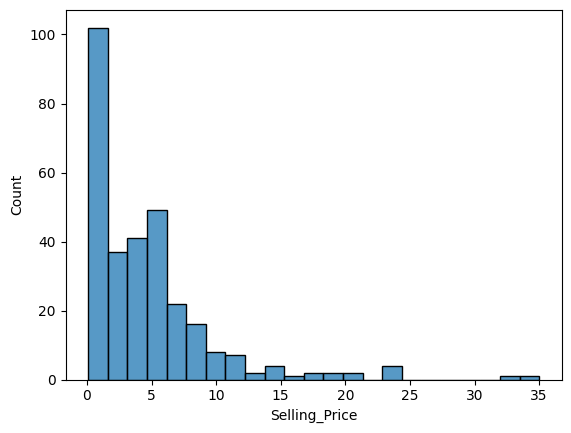

In [18]:
import seaborn as sns
sns.histplot(df.Selling_Price)

In [27]:
correl = df[['Year',	'Selling_Price',	'Present_Price',	'Kms_Driven',	'Owner']].corr()

<Axes: >

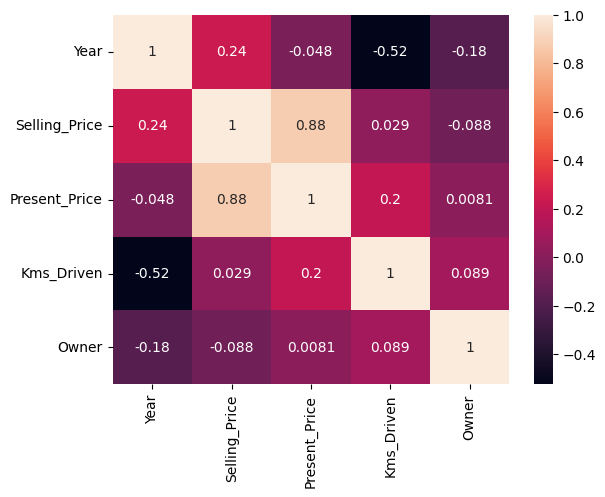

In [29]:
sns.heatmap(correl,annot=True)

**Present_Price and Selling_price is highly correrlated, so considering only one input feature Present_price predict Selling_Price**

### Simple Linear Regression

In [31]:
#getting data ready
from sklearn.model_selection import train_test_split
train,test = train_test_split(df,test_size=0.2,random_state=13)

In [37]:
X = train[['Present_Price']]
y = train.Selling_Price

In [40]:
#fitting the linear model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)


LinearRegression()

In [42]:
#make predictions of train data
predictions = model.predict(X)

In [43]:
#validate train error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(predictions,y)
np.sqrt(mse)

2.4261769626597807

### Loss  : 2.426

**This is a good error rate**

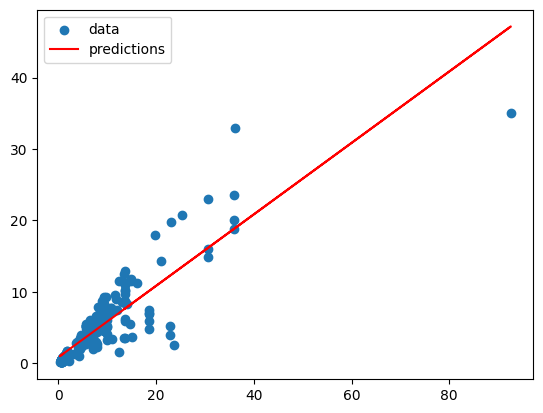

In [57]:
#see the best fit line
plt.scatter(X,y,label='data')
plt.plot(X,predictions,'r',label='predictions')
plt.legend()

*From this graph, we can identify that the line is a best fit to the data*

*the weight, and intercept would be*

In [56]:
print(f"w : {model.coef_}")
print(f"intercept : {model.intercept_}")

w : [0.50042372]
intercept : 0.8234789588897944


*so the linear regression equation is ,*

### $y = 0.5004 x + 0.8234$

### Multiple Linear Regression

*considering 2 input features **Present_Price** and **Year** as both have better correlation with **Selling_Price** than other features*

In [61]:
X = df[['Present_Price','Year']]
y = df[['Selling_Price']]

In [63]:
#fitting the model
mlr_model = LinearRegression()
mlr_model.fit(X,y)

LinearRegression()

In [64]:
pred = mlr_model.predict(X)

In [67]:
#validation
error = mean_squared_error(pred,y)
print(f"rmse : {np.sqrt(error)}")


rmse : 1.9649567086244788


we can see here that the **error is lesser** than the previous model,might be because of
* more number of features
 

In [68]:
# weights,intercept
print(f"w : {mlr_model.coef_}")
print(f"intercept : {mlr_model.intercept_}")

w : [[0.52464416 0.48972229]]
intercept : [-985.45941691]


* The feature Present_Price has the co-eff 0.52
* The feature Year has co-eff 0.489
* Intercept = -985.45
#### Selling_Price($y$) = 0.524 * Present_price($x_{1}$) + 0.489 * Year($x_{2}$) -985.459

**The second model might give better results than first**

#### Considering categorical values
as far we have only used numerical features to create a model , but the categorical features of the model may also be affect the prediction in some ways 
so we are now taking the whole features of the dataset

In [75]:
df.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0


In [77]:
#converting categorical data to numeric for model's convinence 
fuel_encoded , fuel_cat = df.Fuel_Type.factorize()
seller_encoded , seller_cat = df.Seller_Type.factorize()
trans_encoded , trans_cat = df.Transmission.factorize()

The **factorize()** function converts the categories into numerical codes. 

It gives both the encoded numeric array and a list specifying the categories corresponding value with index.

In [85]:
seller_cat,seller_encoded

(Index(['Dealer', 'Individual'], dtype='object'),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [81]:
car = df.copy()
car['Fuel_Type'] = fuel_encoded
car['Seller_Type'] = seller_encoded
car['Transmission'] = trans_encoded

In [82]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [91]:
# craete and fit the model with every features
X = car.drop(['Car_Name','Selling_Price'],axis=1)
y = car['Selling_Price'].copy()

In [92]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=13)

In [95]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((240, 7), (61, 7), (240,), (61,))

In [96]:
lm = LinearRegression()
lm.fit(X_train,y_train)
train_pred = lm.predict(X_train)
error = mean_squared_error(y_train,train_pred)
print(f"rmse : {np.sqrt(error)}")

rmse : 1.7454498724931704


In [98]:
test_pred = lm.predict(X_test)
test_error = mean_squared_error(y_test,test_pred)
print(f"rmse : {np.sqrt(test_error)}")

rmse : 1.8877985173380991


*The rmse is **lesser** than all the other models previously fitted*
## Conclusion
* rmse considering only one feature Present_Price = 2.426
* rmse considering two numeric features Present_Price,Year = 1.96
* rmse considering all the features = 1.745

The best model for this data is considering all the features both categorical and numerical, that gives a lesser rmse value 